# edas 003 - lab 1 - python

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./ArquivosLaboratorio/Arquivo_Treino.csv", delimiter=';')
data.describe()
data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [2]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968,349.0,360.0,1.0,Semiurban,N


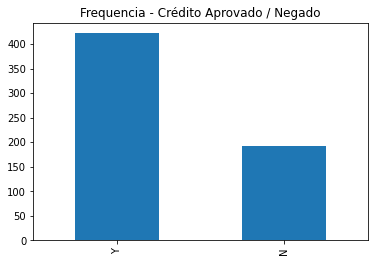

In [3]:

plt = data["Loan_Status"].value_counts().plot(kind='bar', title='Frequencia - Crédito Aprovado / Negado')

In [4]:
credit_approved = data["Loan_Status"] == "Y" 
data[credit_approved].describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,413.000000,422.000000,4.220000e+02,411.000000,414.000000,385.000000
mean,0.767554,5384.068720,2.718160e+07,144.294404,341.072464,0.981818
std,1.014082,5765.441615,4.860694e+08,85.484607,63.247770,0.133782
min,0.000000,210.000000,0.000000e+00,17.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000e+00,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1.280000e+03,126.000000,360.000000,1.000000
75%,2.000000,5771.500000,2.324000e+03,161.000000,360.000000,1.000000
max,3.000000,63337.000000,9.858000e+09,700.000000,480.000000,1.000000


<AxesSubplot:>

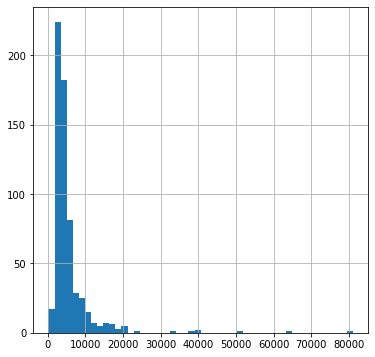

In [5]:
data['ApplicantIncome'].hist(bins=50, figsize=(6,6))

<AxesSubplot:>

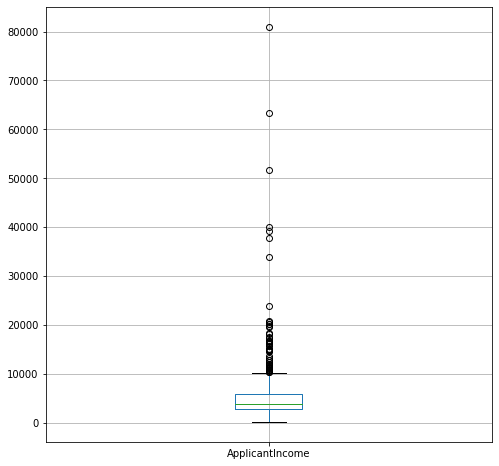

In [6]:
data.boxplot(column='ApplicantIncome', figsize=(8,8))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

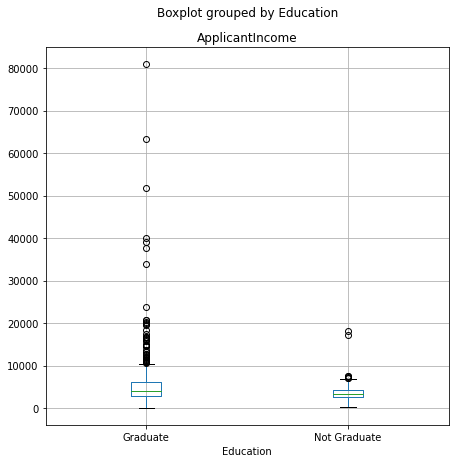

In [7]:
data.boxplot(column='ApplicantIncome', figsize=(7,7), by='Education')

<AxesSubplot:>

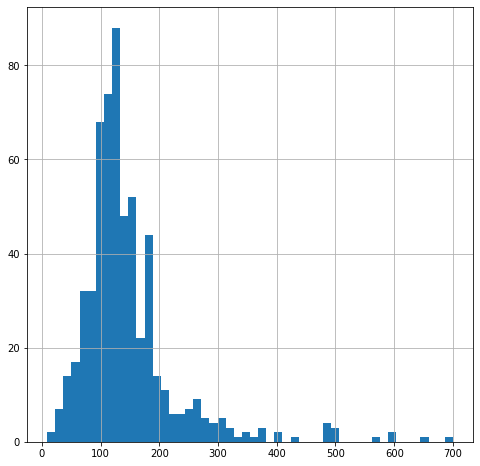

In [8]:
data['LoanAmount'].hist(bins=50, figsize=(8,8))

In [36]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print(temp1[0])
print(temp1[1])
print(temp1.index[0])

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

temp2[0]

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
89
475
0.0

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


KeyError: 0

<AxesSubplot:title={'center':'Probabilidade de Empréstimo por Histórico'}, xlabel='Credit_History', ylabel='Probabilidade de Empréstimo'>

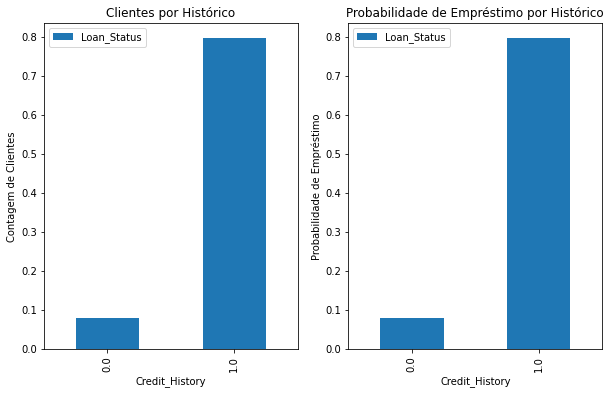

In [43]:


from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)

ax1.set_xlabel('Histórico de Crédito')
ax1.set_ylabel('Contagem de Clientes')
ax1.set_title('Clientes por Histórico')

temp2.plot(kind='bar', ax=ax1)

ax2.set_xlabel('Histórico de Crédito')
ax2.set_ylabel('Probabilidade de Empréstimo')
ax2.set_title('Probabilidade de Empréstimo por Histórico')

temp2.plot(kind='bar', ax=ax2)